In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [15]:
df = pd.read_csv('speed-dating_csv.csv')

In [16]:
df.head()

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,...,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,0,1,female,21.0,27.0,6,[4-6],asian/pacific islander/asian-american,european/caucasian-american,0,...,[0-3],[3-5],7.0,6.0,[6-8],[5-6],0.0,1,0,0
1,0,1,female,21.0,22.0,1,[0-1],asian/pacific islander/asian-american,european/caucasian-american,0,...,[0-3],[3-5],7.0,5.0,[6-8],[5-6],1.0,1,0,0
2,1,1,female,21.0,22.0,1,[0-1],asian/pacific islander/asian-american,asian/pacific islander/asian-american,1,...,[0-3],[3-5],7.0,NaN,[6-8],[0-4],1.0,1,1,1
3,0,1,female,21.0,23.0,2,[2-3],asian/pacific islander/asian-american,european/caucasian-american,0,...,[0-3],[3-5],7.0,6.0,[6-8],[5-6],0.0,1,1,1
4,0,1,female,21.0,24.0,3,[2-3],asian/pacific islander/asian-american,latino/hispanic american,0,...,[0-3],[3-5],6.0,6.0,[6-8],[5-6],0.0,1,1,1


In [17]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 123 columns):
has_null                           int64
wave                               int64
gender                             object
age                                float64
age_o                              float64
d_age                              int64
d_d_age                            object
race                               object
race_o                             object
samerace                           int64
importance_same_race               float64
importance_same_religion           float64
d_importance_same_race             object
d_importance_same_religion         object
field                              object
pref_o_attractive                  float64
pref_o_sincere                     float64
pref_o_intelligence                float64
pref_o_funny                       float64
pref_o_ambitious                   float64
pref_o_shared_interests            float64
d_pr

# Exploratory Data Analysis (EDA)

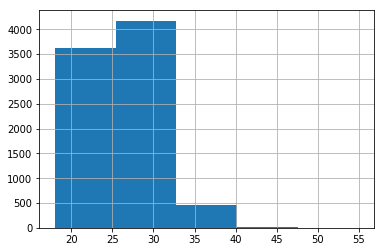

In [18]:
df['age'].hist(bins=5)
# survey shows for people between 20 - 40 years old

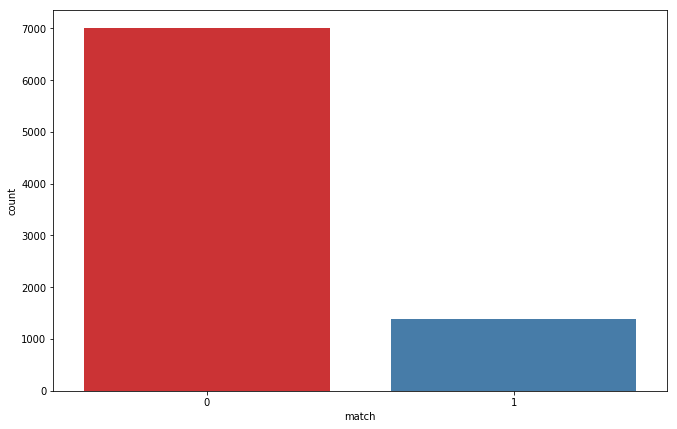

In [19]:
plt.figure(figsize=(11,7))
sns.countplot(x='match',data=df,palette='Set1')

# Survey data shows more unlucky person found the match

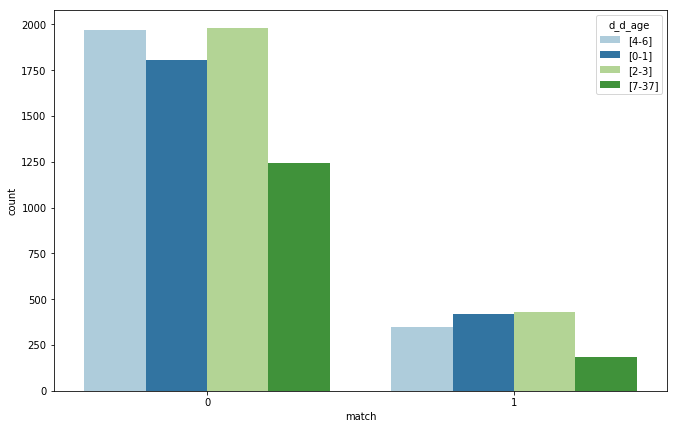

In [20]:
plt.figure(figsize=(11,7))
sns.countplot(x='match',hue='d_d_age',data=df,palette='Paired')

# Survey shows age different between [2-3] has better luck to find the match

In [23]:
# Correlation Heatmap (Mark's sugesstion)
#High level
df1 = df.drop(list(df.filter(regex = 'd_')), axis = 1)
df2 = df1.drop(['has_null','wave','race','race_o','field','gender'],axis=1)

In [24]:
df2.head()

,age,age_o,samerace,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,...,music,shopping,yoga,interests_correlate,like,guess_prob_liked,met,decision,decision_o,match
0,21.0,27.0,0,2.0,4.0,35.0,20.0,20.0,20.0,0.0,...,9.0,8.0,1.0,0.14,7.0,6.0,0.0,1,0,0
1,21.0,22.0,0,2.0,4.0,60.0,0.0,0.0,40.0,0.0,...,9.0,8.0,1.0,0.54,7.0,5.0,1.0,1,0,0
2,21.0,22.0,1,2.0,4.0,19.0,18.0,19.0,18.0,14.0,...,9.0,8.0,1.0,0.16,7.0,NaN,1.0,1,1,1
3,21.0,23.0,0,2.0,4.0,30.0,5.0,15.0,40.0,5.0,...,9.0,8.0,1.0,0.61,7.0,6.0,0.0,1,1,1
4,21.0,24.0,0,2.0,4.0,30.0,10.0,20.0,10.0,10.0,...,9.0,8.0,1.0,0.21,6.0,6.0,0.0,1,1,1


In [25]:
df2.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 54 columns):
age                         8283 non-null float64
age_o                       8274 non-null float64
samerace                    8378 non-null int64
importance_same_race        8299 non-null float64
importance_same_religion    8299 non-null float64
pref_o_attractive           8289 non-null float64
pref_o_sincere              8289 non-null float64
pref_o_intelligence         8289 non-null float64
pref_o_funny                8280 non-null float64
pref_o_ambitious            8271 non-null float64
attractive_o                8166 non-null float64
sinsere_o                   8091 non-null float64
intelligence_o              8072 non-null float64
funny_o                     8018 non-null float64
ambitous_o                  7656 non-null float64
attractive_important        8299 non-null float64
sincere_important           8299 non-null float64
intellicence_important      8299 non-null flo

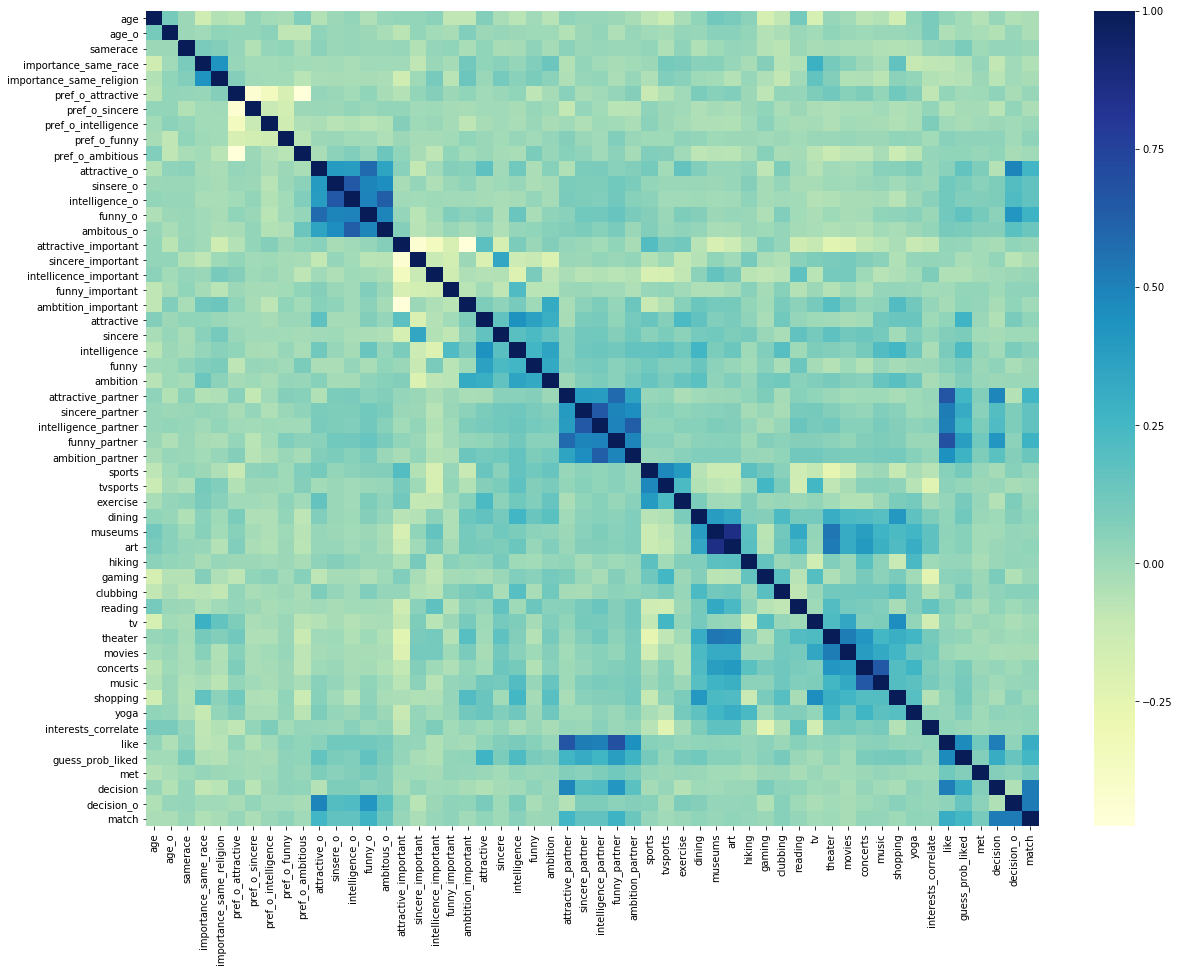

In [29]:
plt.figure(figsize=(20,15))
c = df2.corr()
sns.heatmap(c,
            xticklabels=c.columns.values,
           yticklabels=c.columns.values,
           cmap="YlGnBu")

In [71]:
cat_feats = ['gender']
dfc = pd.get_dummies(df,columns=cat_feats,drop_first=True)
dfc.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 123 columns):
has_null                           int64
wave                               int64
age                                float64
age_o                              float64
d_age                              int64
d_d_age                            object
race                               object
race_o                             object
samerace                           int64
importance_same_race               float64
importance_same_religion           float64
d_importance_same_race             object
d_importance_same_religion         object
field                              object
pref_o_attractive                  float64
pref_o_sincere                     float64
pref_o_intelligence                float64
pref_o_funny                       float64
pref_o_ambitious                   float64
pref_o_shared_interests            float64
d_pref_o_attractive                object
d_pr

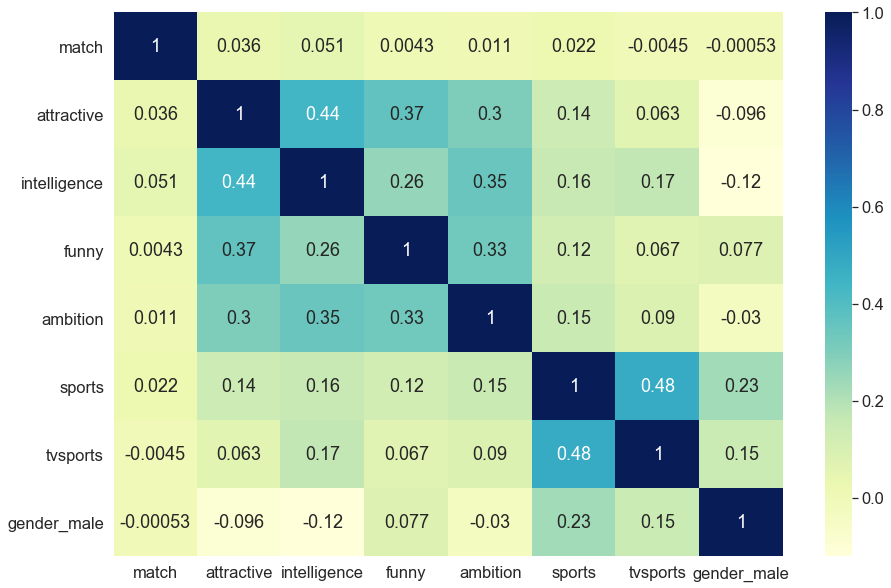

In [85]:
#Low level Correlation Heatmap

df3 = pd.concat([dfc['match'],dfc['attractive'],dfc['intelligence'],dfc['funny'],dfc['ambition'],dfc['sports'],
                 dfc['tvsports'],dfc['gender_male']],axis=1)
plt.figure(figsize=(15,10))
c = df3.corr()
sns.set(font_scale=1.5)
sns.heatmap(c,
            xticklabels=c.columns.values,
           yticklabels=c.columns.values,
           cmap="YlGnBu",annot=True)

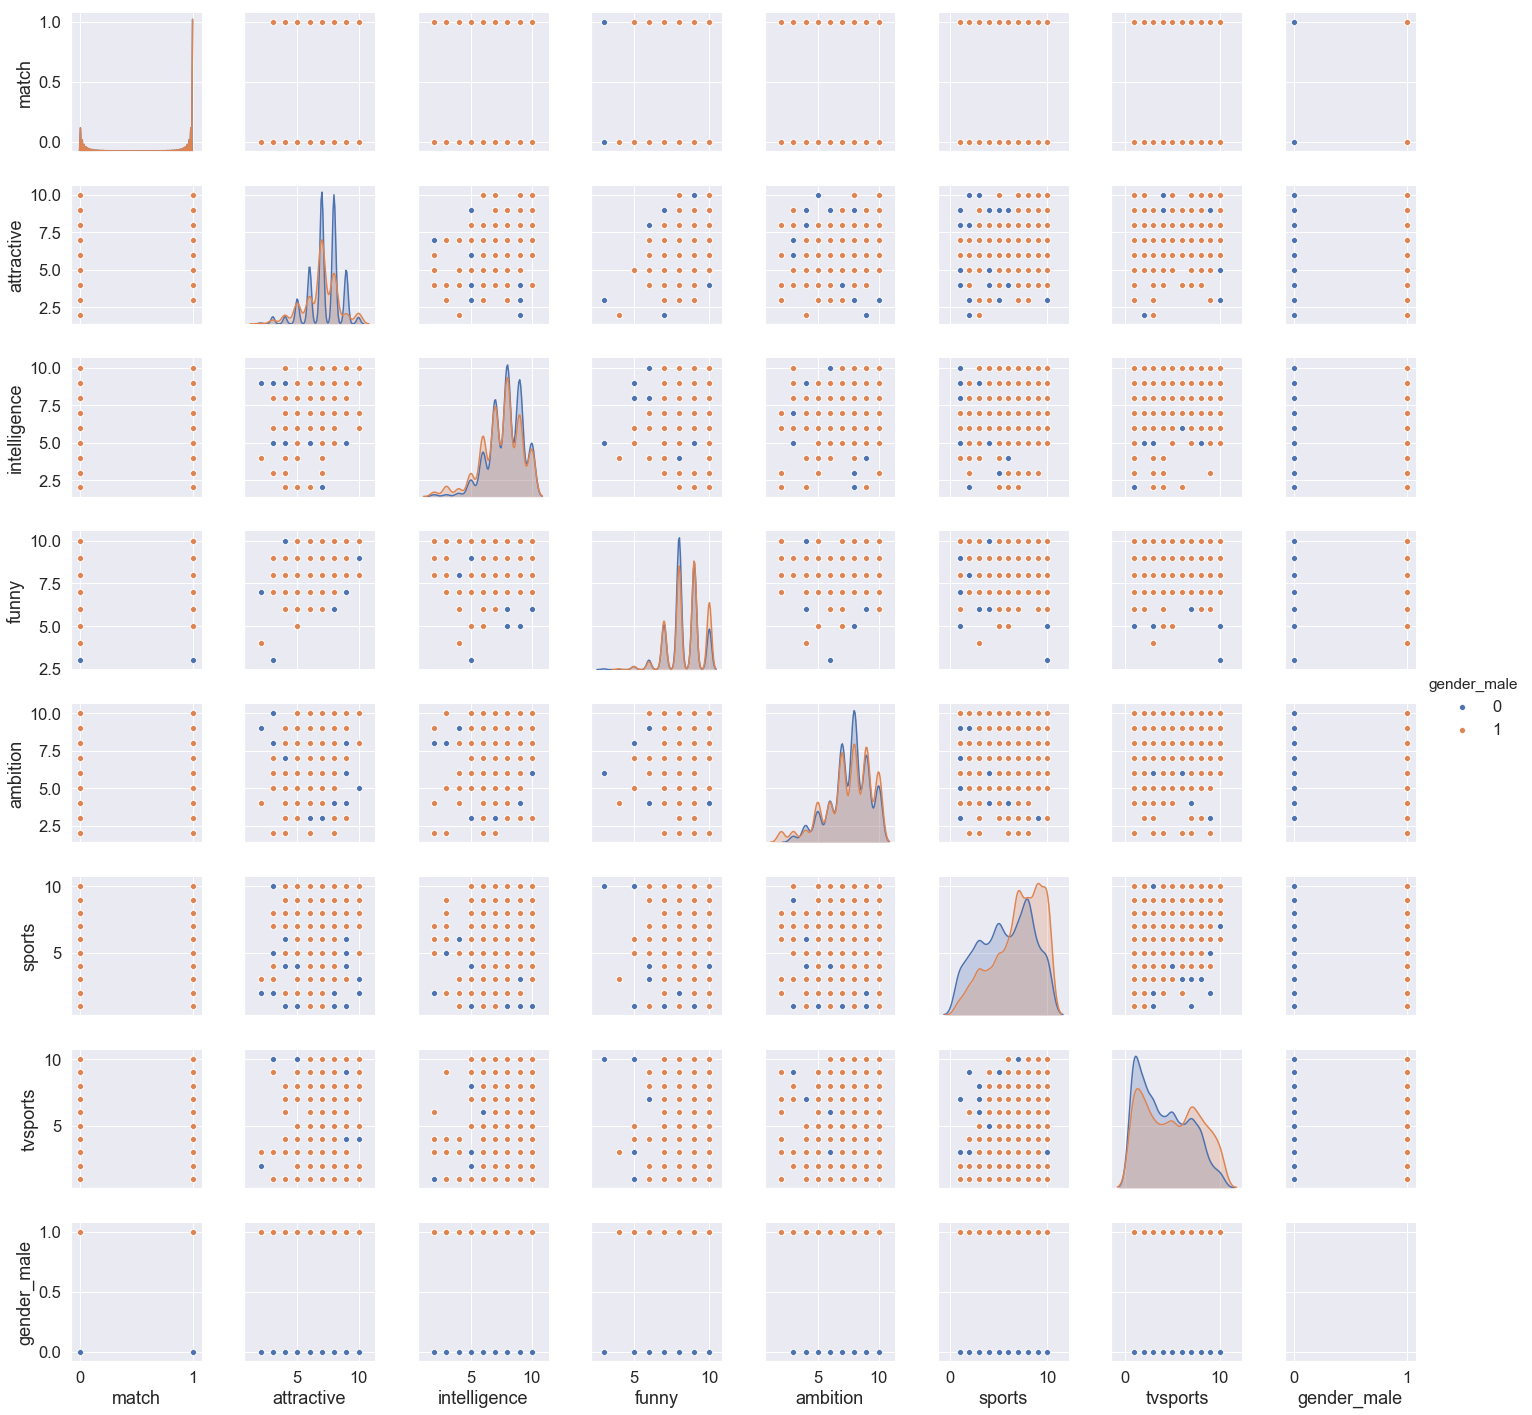

In [86]:
sns.pairplot(df3,hue='gender_male')

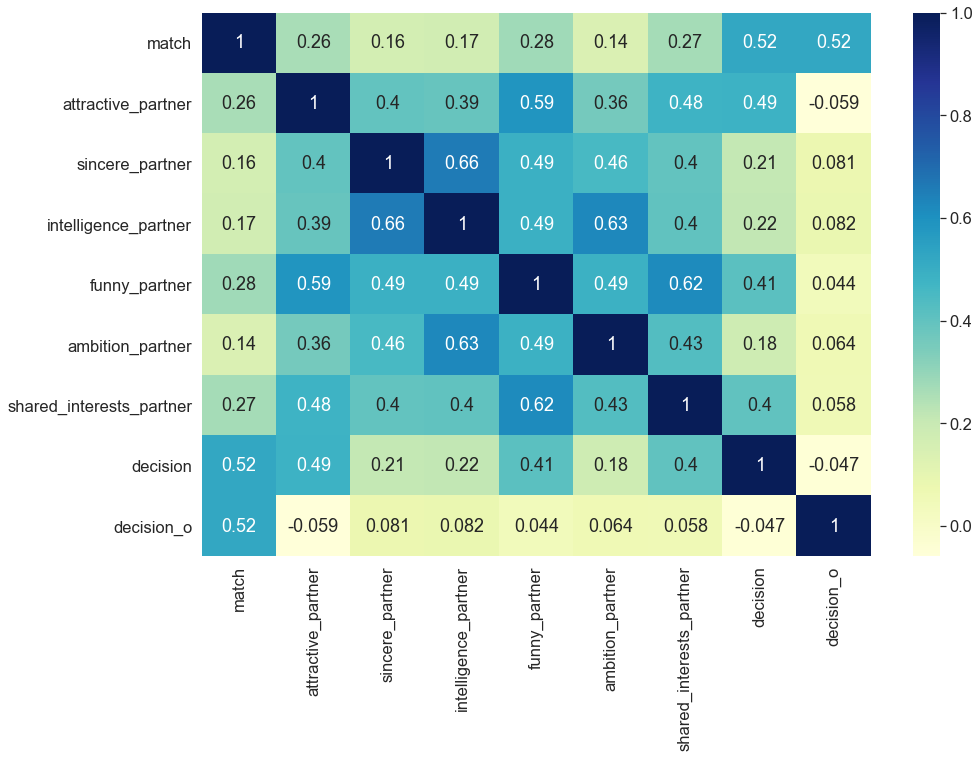

In [54]:
#Low level Correlation Heatmap

df4 = pd.concat([df['match'],df['attractive_partner'],df['sincere_partner'],df['intelligence_partner'],df['funny_partner'],df['ambition_partner'],
                 df['shared_interests_partner'],df['decision'],df['decision_o']],axis=1)
plt.figure(figsize=(15,10))
d = df4.corr()
sns.set(font_scale=1.5)
sns.heatmap(d,
            xticklabels=d.columns.values,
           yticklabels=d.columns.values,
           cmap="YlGnBu",annot=True)

# Data Cleaning

In [87]:
# Drop columns that start with 'd_' and couple others that not used
df.drop(list(df.filter(regex = 'd_')), axis = 1, inplace = True)

In [88]:
df.drop(['has_null','wave','race','race_o','field'],axis=1, inplace = True)

In [89]:
df.head()

,gender,age,age_o,samerace,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,...,music,shopping,yoga,interests_correlate,like,guess_prob_liked,met,decision,decision_o,match
0,female,21.0,27.0,0,2.0,4.0,35.0,20.0,20.0,20.0,...,9.0,8.0,1.0,0.14,7.0,6.0,0.0,1,0,0
1,female,21.0,22.0,0,2.0,4.0,60.0,0.0,0.0,40.0,...,9.0,8.0,1.0,0.54,7.0,5.0,1.0,1,0,0
2,female,21.0,22.0,1,2.0,4.0,19.0,18.0,19.0,18.0,...,9.0,8.0,1.0,0.16,7.0,NaN,1.0,1,1,1
3,female,21.0,23.0,0,2.0,4.0,30.0,5.0,15.0,40.0,...,9.0,8.0,1.0,0.61,7.0,6.0,0.0,1,1,1
4,female,21.0,24.0,0,2.0,4.0,30.0,10.0,20.0,10.0,...,9.0,8.0,1.0,0.21,6.0,6.0,0.0,1,1,1


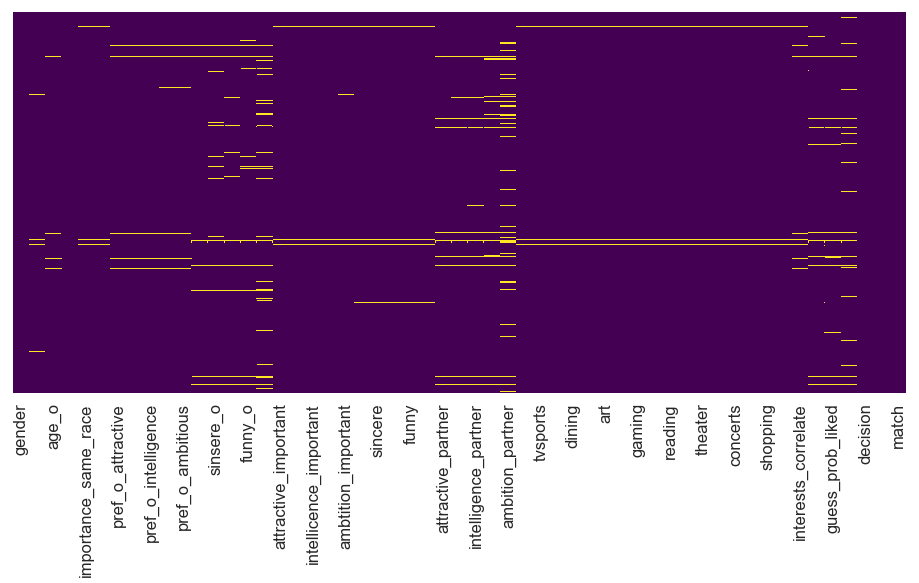

In [90]:
#Find out the missing data using Heatmap
plt.figure(figsize=(16,7))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [91]:
# Drop records that age is null 
df.dropna(subset=['age','age_o'], inplace = True)
df.shape

(8180, 55)

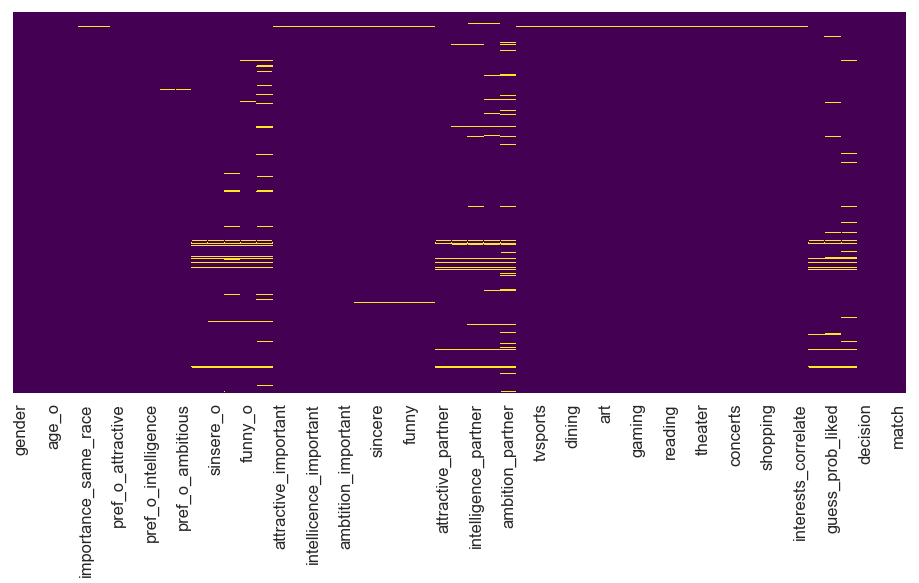

In [92]:
#Find out the missing data using Heatmap
plt.figure(figsize=(16,7))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [94]:
df.dropna(inplace = True)
df.shape

(6503, 55)

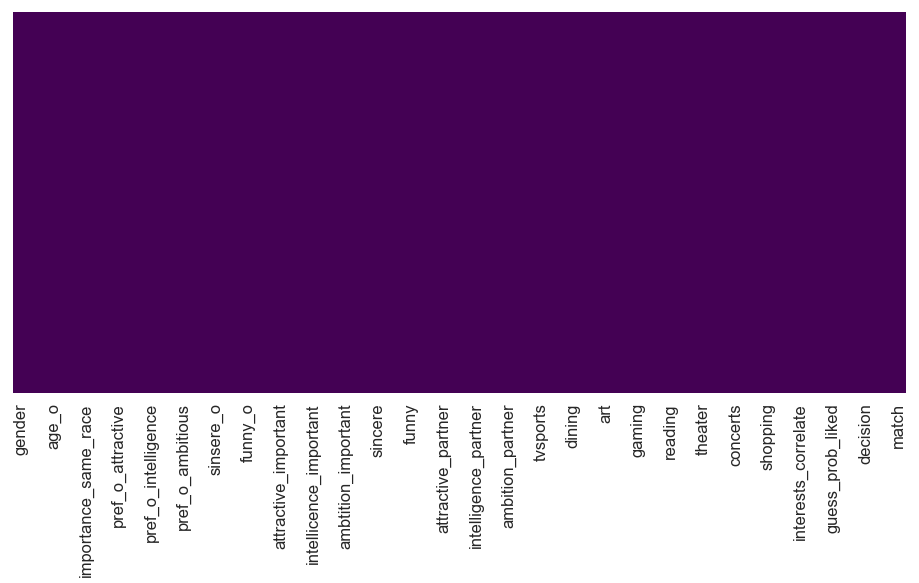

In [95]:
#Find out the missing data using Heatmap
plt.figure(figsize=(16,7))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [96]:
df.head()

,gender,age,age_o,samerace,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,...,music,shopping,yoga,interests_correlate,like,guess_prob_liked,met,decision,decision_o,match
0,female,21.0,27.0,0,2.0,4.0,35.0,20.0,20.0,20.0,...,9.0,8.0,1.0,0.14,7.0,6.0,0.0,1,0,0
1,female,21.0,22.0,0,2.0,4.0,60.0,0.0,0.0,40.0,...,9.0,8.0,1.0,0.54,7.0,5.0,1.0,1,0,0
3,female,21.0,23.0,0,2.0,4.0,30.0,5.0,15.0,40.0,...,9.0,8.0,1.0,0.61,7.0,6.0,0.0,1,1,1
4,female,21.0,24.0,0,2.0,4.0,30.0,10.0,20.0,10.0,...,9.0,8.0,1.0,0.21,6.0,6.0,0.0,1,1,1
5,female,21.0,25.0,0,2.0,4.0,50.0,0.0,30.0,10.0,...,9.0,8.0,1.0,0.25,6.0,5.0,0.0,0,1,0


In [97]:
cat_feats = ['gender']
df = pd.get_dummies(df,columns=cat_feats,drop_first=True)
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6503 entries, 0 to 8377
Data columns (total 55 columns):
age                         6503 non-null float64
age_o                       6503 non-null float64
samerace                    6503 non-null int64
importance_same_race        6503 non-null float64
importance_same_religion    6503 non-null float64
pref_o_attractive           6503 non-null float64
pref_o_sincere              6503 non-null float64
pref_o_intelligence         6503 non-null float64
pref_o_funny                6503 non-null float64
pref_o_ambitious            6503 non-null float64
attractive_o                6503 non-null float64
sinsere_o                   6503 non-null float64
intelligence_o              6503 non-null float64
funny_o                     6503 non-null float64
ambitous_o                  6503 non-null float64
attractive_important        6503 non-null float64
sincere_important           6503 non-null float64
intellicence_important      6503 non-null flo

In [98]:
df.head()

,age,age_o,samerace,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,...,shopping,yoga,interests_correlate,like,guess_prob_liked,met,decision,decision_o,match,gender_male
0,21.0,27.0,0,2.0,4.0,35.0,20.0,20.0,20.0,0.0,...,8.0,1.0,0.14,7.0,6.0,0.0,1,0,0,0
1,21.0,22.0,0,2.0,4.0,60.0,0.0,0.0,40.0,0.0,...,8.0,1.0,0.54,7.0,5.0,1.0,1,0,0,0
3,21.0,23.0,0,2.0,4.0,30.0,5.0,15.0,40.0,5.0,...,8.0,1.0,0.61,7.0,6.0,0.0,1,1,1,0
4,21.0,24.0,0,2.0,4.0,30.0,10.0,20.0,10.0,10.0,...,8.0,1.0,0.21,6.0,6.0,0.0,1,1,1,0
5,21.0,25.0,0,2.0,4.0,50.0,0.0,30.0,10.0,0.0,...,8.0,1.0,0.25,6.0,5.0,0.0,0,1,0,0


# Modeling - Classification

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

def get_model_results(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    print (confusion_matrix(y_test, predicted))
    print('\n')
    print (classification_report(y_test, predicted))
    #plt.scatter(y_test, predicted)
    

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('match',axis=1)
y = df['match']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
y_test

In [ ]:
#counting null values
df.isnull().sum()

In [ ]:
pd.crosstab(index=df['match'], columns='counts')

## Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [ ]:
model.fit(X_train, y_train)

In [ ]:
predicted = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print (confusion_matrix(y_test, predicted))

In [ ]:
# Run the function get_model_results
get_model_results(X_train, y_train, X_test, y_test, dtree)

## Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)

In [ ]:
get_model_results(X_train, y_train, X_test, y_test, rfc)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()

In [ ]:
# Run the function get_model_results
get_model_results(X_train, y_train, X_test, y_test, logmodel)

## Using KNN

### Standardize the Variables

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()